<a href="https://colab.research.google.com/github/MiLiz2020/estadistica-inferencial/blob/master/Regresi%C3%B3n_l%C3%ADneal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresión lineal

 $$y=\beta_0 +\beta_1$$
 $$\hat(y_i)= b_0+b_1\cdot x_i +E_i$$

In [13]:
pip install ggplot

     |████████████████████████████████| 2.2MB 5.5MB/s 


In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [21]:
mtcars = pd.read_csv("https://raw.githubusercontent.com/MiLiz2020/estadistica-inferencial/master/datasets/mtcars.csv")

In [22]:
mtcars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


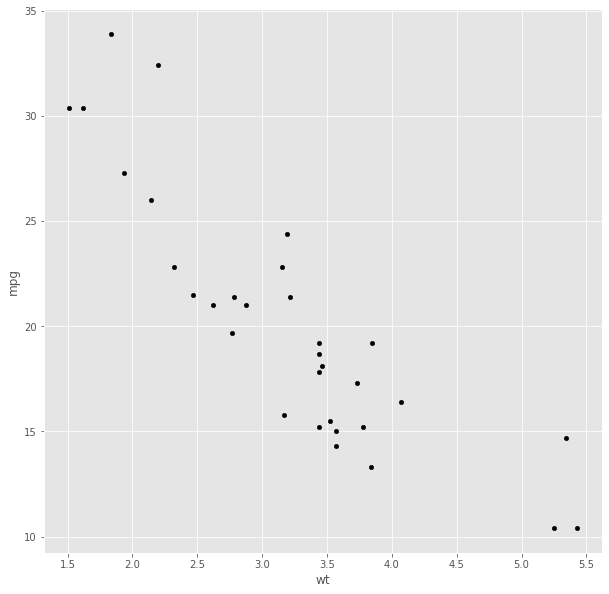

In [26]:
mtcars.plot(kind = "scatter", x = "wt", y = "mpg", figsize = (10,10), color = "black")

In [30]:
from sklearn import linear_model

In [33]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(mtcars["wt"]),
                     y = mtcars["mpg"])
print(regression_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [34]:
print(regression_model.intercept_)
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


$$mpg = 37.28512616734204 - 5.34447157\cdot wt$$

In [35]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), y = mtcars["mpg"])

0.7528327936582646

In [36]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))
print(train_prediction)

[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


In [37]:
residuals = mtcars["mpg"] - train_prediction
print(residuals)
residuals.describe()

0    -2.282611
1    -0.919770
2    -2.085952
3     1.297350
4    -0.200144
5    -0.693255
6    -3.905363
7     4.163738
8     2.349959
9     0.299856
10   -1.100144
11    0.866873
12   -0.050247
13   -1.883024
14    1.173350
15    2.103288
16    5.981074
17    6.872711
18    1.746195
19    6.421979
20   -2.611004
21   -2.972586
22   -3.726866
23   -3.462355
24    2.464367
25    0.356426
26    0.152043
27    1.201059
28   -4.543151
29   -2.780940
30   -3.205363
31   -1.027495
Name: mpg, dtype: float64


count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [38]:
SSE = (residuals**2).sum()
SST = ((mtcars["mpg"]- mtcars["mpg"].mean())**2).sum()
1-(SSE/SST)

0.7528327936582646

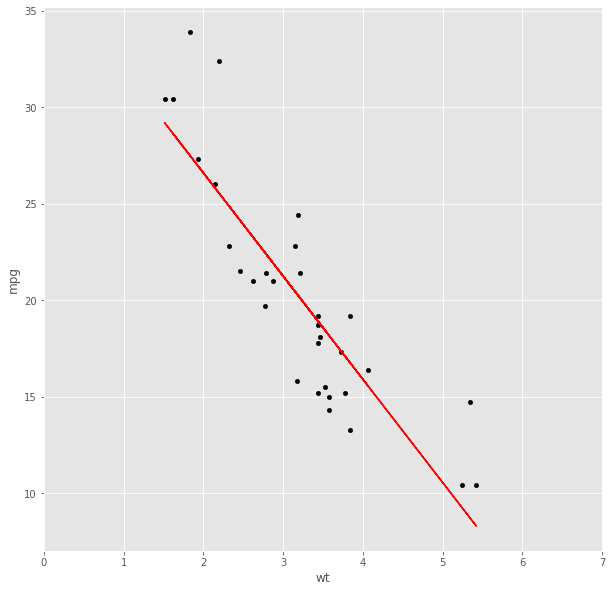

In [40]:
mtcars.plot(kind = "scatter", x = "wt", y = "mpg", figsize = (10,10), color = "black", xlim= (0,7))
plt.plot(mtcars["wt"], train_prediction, color = "red")

**Análisis de los** **residuos** 

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458974, -8.074143041746

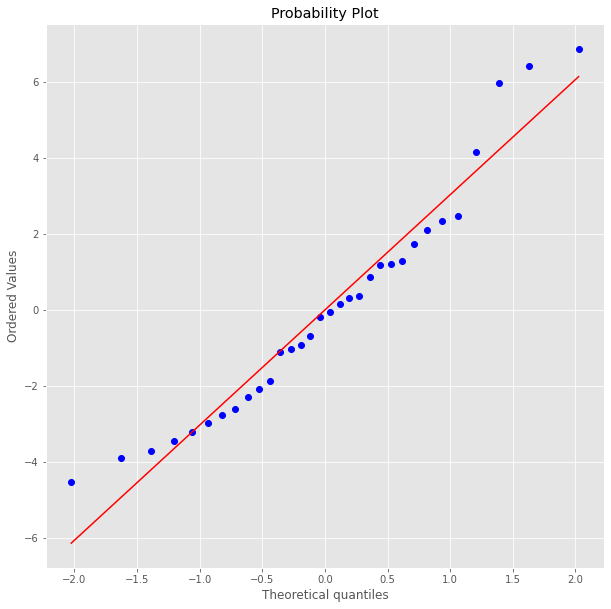

In [41]:
plt.figure(figsize=(10,10))
stats.probplot(residuals, dist="norm", plot = plt)

$$RMSE = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y_i})^2}{n}}$$

In [43]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.05
print(RMSE)

1.1142172377820003


**Outliers**

In [45]:
mtcars_subset = mtcars[["mpg", "wt"]]
supercar = pd.DataFrame({"mpg" : 50, "wt": 10}, index = ["super"])
new_cars = mtcars_subset.append(supercar)

In [46]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(new_cars["wt"]),
                     y = new_cars["mpg"])
train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

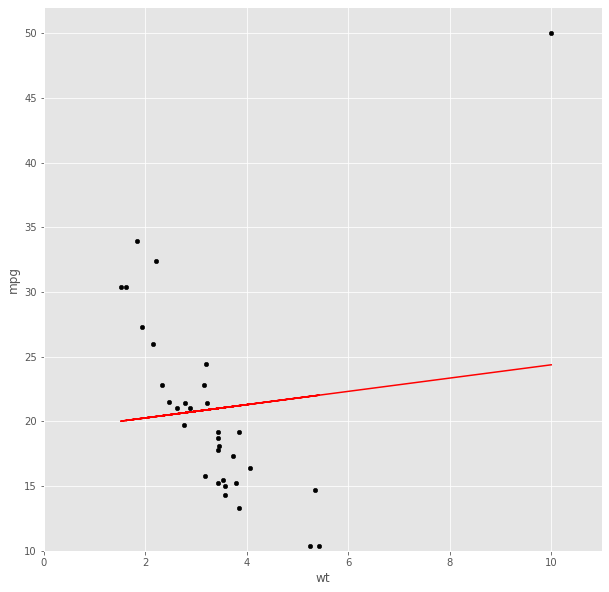

In [48]:
new_cars.plot(kind = "scatter", x = "wt", y = "mpg", figsize = (10,10), color = "black", xlim= (0,11), ylim = (10,52))
plt.plot(new_cars["wt"], train_prediction2, color = "red")

**Regresión plonómica**

$$\hat{y} = b_0 + b_1\cdot x + b_2 \cdot x ^2 + b_3\cdot x^3+\cdots + b_m\cdot x^m$$

In [49]:
poly_model = linear_model.LinearRegression()
predictora =pd.DataFrame([mtcars["wt"], mtcars["wt"]**2]).T
poly_model.fit(X = predictora, y = mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print(poly_model.intercept_)
print(poly_model.coef_)

49.9308109494518
[-13.38033708   1.17108689]


$$ mpg = 49.9308109494518 - 13.38033708 \cdot wt + 1.17108689 \cdot w^2$$

In [51]:
poly_model.score(X = predictora, y = mtcars["mpg"])

0.8190613581384094

In [52]:
poly_range = np.arange(0, 6, 0.1)
poly_regr = pd.DataFrame((poly_range, poly_range**2)).T
y_regr = poly_model.predict(X=poly_regr)

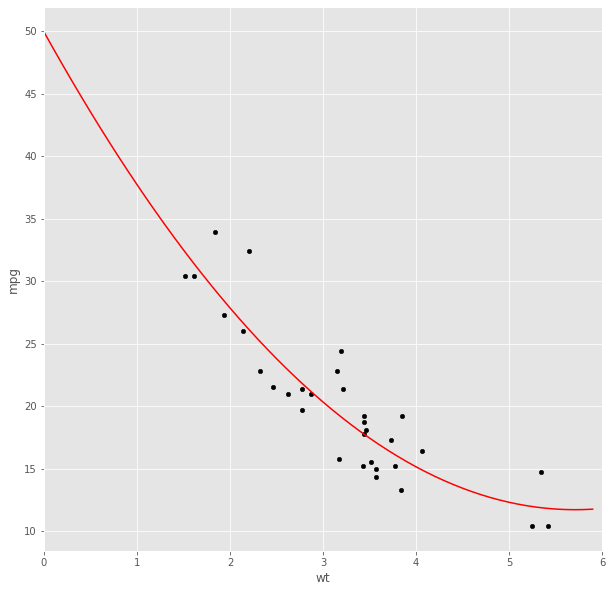

In [53]:
mtcars.plot(kind = "scatter", x = "wt", y = "mpg", figsize = (10,10), color = "black", xlim= (0,6))
plt.plot(poly_range, y_regr, color = "red")

In [54]:
preds = poly_model.predict(X = predictora)
mean_squared_error(preds, mtcars["mpg"])**0.5

2.523300472461079

**Modelo polinómico de orden superior**

In [55]:
poly_model = linear_model.LinearRegression()
predictora = pd.DataFrame([mtcars["wt"], mtcars["wt"]**2, mtcars["wt"]**3, mtcars["wt"]**4, mtcars["wt"]**5, mtcars["wt"]**6, mtcars["wt"]**7, mtcars["wt"]**8,
                           mtcars["wt"]**9, mtcars["wt"]**10]).T

poly_model.fit(X = predictora, y= mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print(poly_model.intercept_)
print(poly_model.coef_)

-14921.121015411694
[ 6.45813588e+04 -1.20086135e+05  1.26931931e+05 -8.46598468e+04
  3.73155204e+04 -1.10334757e+04  2.16590407e+03 -2.70730547e+02
  1.94974164e+01 -6.15515442e-01]


In [57]:
poly_model.score(X = predictora, y= mtcars["mpg"])

0.8702106581688225

In [59]:
x_range = np.arange(1.5, 5.45, 0.01)
poly_reg = pd.DataFrame([x_range, x_range**2, x_range**3, x_range**4, x_range**5, x_range**6, x_range**7, x_range**8, x_range**9, x_range**10]).T
y_pred = poly_model.predict(X = poly_reg)

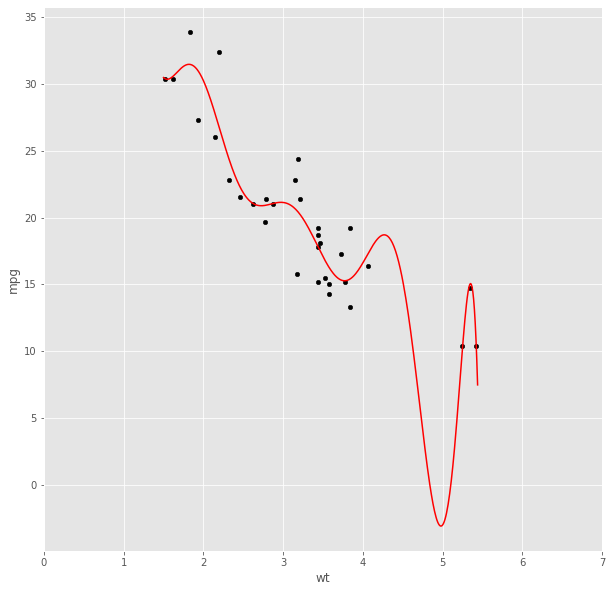

In [60]:
mtcars.plot(kind = "scatter", x = "wt", y = "mpg", figsize = (10,10), color = "black", xlim= (0,7))
plt.plot(x_range, y_pred, color = "red")

In [63]:
from sklearn.metrics import mean_squared_error
preds = poly_model.predict(X = predictora)
mean_squared_error(preds, mtcars["mpg"])**0.85

3.6366273088028978